#### Data In Motion
#### Weekly Pandas Challenge Week #8


Challenge Questions

1. How many columns and rows are in the dataset?
2. Is there any missing data?
3. Display the summary statistics of the numeric columns using the describe method.
4. Rename the following columns:
        1 coaster_name ➡️ Coaster_Name
        2 year_introduced ➡️ Year_Introduced
        3 opening_date_clean ➡️ Opening_Date
        4 speed_mph ➡️ Speed_mph
        5 height_ft ➡️ Height_ft
        6 Inversions_clean ➡️ Inversions
        7 Gforce_clean ➡️ Gforce
5. Are there any duplicated rows?
6. What are the top 3 years with the most roller coasters introduced?
7. What is the average speed? Also display a plot to show it's distribution.
8. Explore the feature relationships. Are there any positively or negatively correlated relationships?
9. Create your own question and answer it.

In [99]:
#Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [100]:
#Loading data
url = 'https://raw.githubusercontent.com/kedeisha1/Challenges/main/coaster_db.csv'

df = pd.read_csv(url)

In [101]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


##### 1. How many columns and rows are in the dataset?

In [102]:
df.shape

(1087, 56)

In [103]:
print('There are {} columns and {} rows in the dataset.'.format(df.shape[1],df.shape[0]))

There are 56 columns and 1087 rows in the dataset.


##### 2. Is there any missing data?

In [13]:
df.isnull().sum()  #total number of missing data in each column in the dataset

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

##### 3. Display the summary statistics of the numeric columns using the describe method.

In [104]:
df.select_dtypes('number').describe() #summary statistics of the numeric columns

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


##### 4. Rename the following columns:
        1 coaster_name ➡️ Coaster_Name
        2 year_introduced ➡️ Year_Introduced
        3 opening_date_clean ➡️ Opening_Date
        4 speed_mph ➡️ Speed_mph
        5 height_ft ➡️ Height_ft
        6 Inversions_clean ➡️ Inversions
        7 Gforce_clean ➡️ Gforce

In [105]:
df.rename(columns = {'coaster_name':'Coaster_Name', 'year_introduced':'Year_Introduced','opening_date_clean':'Opening_Date',
                     'speed_mph':'Speed_mph','height_ft':'Height_ft','Inversions_clean':'Inversions', 
                     'Gforce_clean':'Gforce'}, inplace = True)

In [106]:
df.columns    #renamed columns

Index(['Coaster_Name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'Year_Introduced', 'latitude', 'longitude', 'Type_Main', 'Opening_Date',
       'speed1', 'speed2', 'speed1_value', 'speed1_unit', 'Speed_mph',
       'height_value', 'height_unit', 'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

##### 5. Are there any duplicated rows?

In [107]:
df.duplicated().sum()  #There are no duplicate rows in the dataset

0

##### 6. What are the top 3 years with the most roller coasters introduced?

In [108]:
df['Year_Introduced'].value_counts().head(3)  #top 3 years

1999    49
2000    47
1998    32
Name: Year_Introduced, dtype: int64

##### 7. What is the average speed? Also display a plot to show it's distribution.

In [109]:
avg = df['speed1_value'].mean()

print('The average speed is: {} mph'.format(round(avg,2)))

The average speed is: 53.85 mph


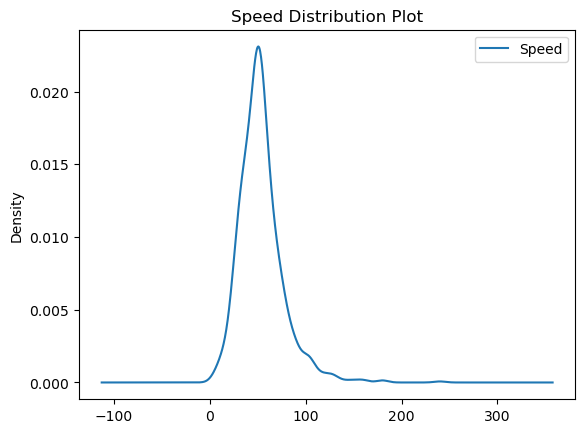

In [110]:
df['speed1_value'].plot(kind='kde', title='Speed Distribution Plot')
plt.legend(['Speed'])

##### 8. Explore the feature relationships. Are there any positively or negatively correlated relationships?

In [111]:
df.corr()

,Inversions,Year_Introduced,latitude,longitude,speed1_value,Speed_mph,height_value,Height_ft,Inversions,Gforce
Inversions,1.000000,0.211003,-0.009815,0.061589,0.163419,0.252209,0.094811,0.171330,1.000000,0.356865
Year_Introduced,0.211003,1.000000,-0.070982,0.175913,0.210191,0.204853,0.087687,0.232150,0.228758,-0.066657
latitude,-0.009815,-0.070982,1.000000,-0.298488,-0.121847,-0.063757,-0.004265,0.011492,-0.014043,0.042871
longitude,0.061589,0.175913,-0.298488,1.000000,0.301179,0.051063,-0.092764,0.159733,0.087160,0.016485
speed1_value,0.163419,0.210191,-0.121847,0.301179,1.000000,0.851667,0.088761,0.815103,0.176105,0.379962
Speed_mph,0.252209,0.204853,-0.063757,0.051063,0.851667,1.000000,0.241461,0.829404,0.265763,0.489337
height_value,0.094811,0.087687,-0.004265,-0.092764,0.088761,0.241461,1.000000,1.000000,0.108199,0.337386
Height_ft,0.171330,0.232150,0.011492,0.159733,0.815103,0.829404,1.000000,1.000000,0.164246,0.475020
Inversions,1.000000,0.228758,-0.014043,0.087160,0.176105,0.265763,0.108199,0.164246,1.000000,0.345106
Gforce,0.356865,-0.066657,0.042871,0.016485,0.379962,0.489337,0.337386,0.475020,0.345106,1.000000


<AxesSubplot:>

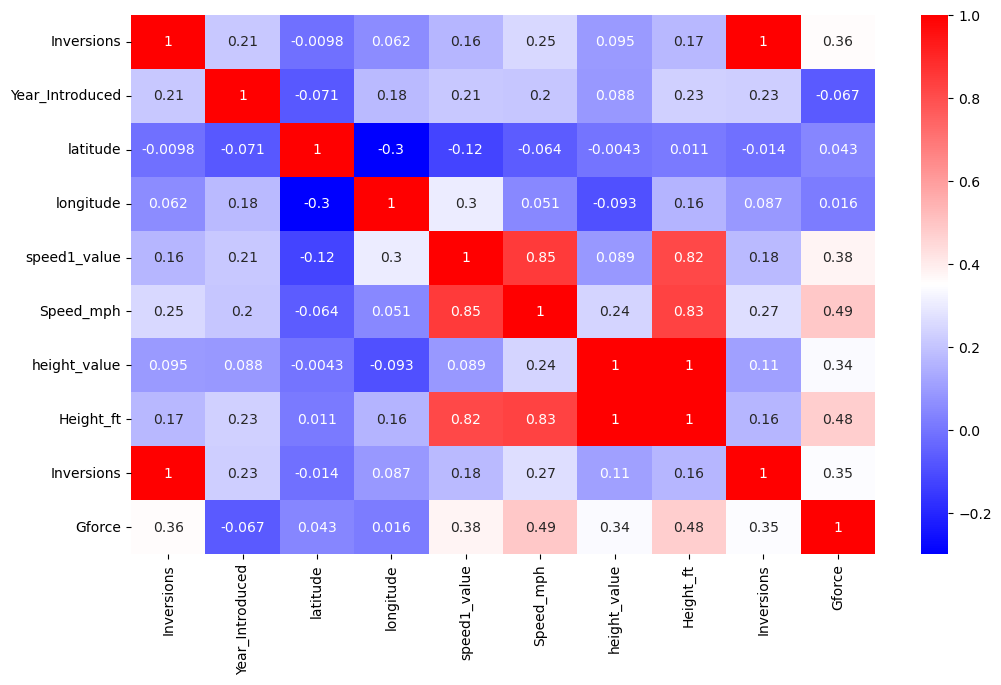

In [112]:
#visulizing correlation using Heatmap

plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),cmap='bwr',annot=True)

Submitted by:

Archana Kokate